In [1]:
import gym
import numpy as np
import torch
import matplotlib.pyplot as plt
import time
from statistics import mean

In [2]:
from gym.wrappers import Monitor

In [3]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
import math
import copy
from torch.distributions import Categorical
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
#Hyper-parameters
max_episodes = 1000          # max training episodes
max_timesteps = 250          # max timesteps in one episode
gamma = 0.01                # discount factor
gamma1 = 0.99
epsilon = 0.2                #need to change it to max(advantage)
dkl=1                       #need to change it to KL divergence between old and new policies
Q_r=[]
Q_r1=[]
a=[]
Q=np.zeros((max_timesteps,2))
mutation_power = 0.02#hyper-parameter, set from https://arxiv.org/pdf/1712.06567.pdf
#print(Q)

In [6]:
class CartPoleAI(nn.Module):
        def __init__(self):
            super().__init__()
            self.fc = nn.Sequential(
                        nn.Linear(4,128, bias=True),
                        nn.ReLU(),
                        nn.Linear(128,2, bias=True),
                        nn.Softmax(dim=1)
                        )

                
        def forward(self, inputs):
            x = self.fc(inputs)
            return x

In [7]:
def init_weights(m):
    
        # nn.Conv2d weights are of shape [16, 1, 3, 3] i.e. # number of filters, 1, stride, stride
        # nn.Conv2d bias is of shape [16] i.e. # number of filters
        
        # nn.Linear weights are of shape [32, 24336] i.e. # number of input features, number of output features
        # nn.Linear bias is of shape [32] i.e. # number of output features
        
        if ((type(m) == nn.Linear) | (type(m) == nn.Conv2d)):
            torch.nn.init.xavier_uniform(m.weight)
            m.bias.data.fill_(0.00)

In [8]:
def behavioural_policy(agents):
    return agent

In [9]:
def KL_divergence(agent1,agent2):
    return KL

In [10]:
def return_random_agents(num_agents):
    
    agents = []
    for _ in range(num_agents):
        
        agent = CartPoleAI()
        
        for param in agent.parameters():
            param.requires_grad = False
            
        init_weights(agent)
        agents.append(agent)
        
        
    return agents

In [11]:
def run_agents(agents):
    
    reward_agents = []
    env = gym.make("CartPole-v0")
    #print("Enter")
    for agent in agents:#There is only one agent in the list. But it is necessary to pass the agents in the form of lists to make it iterable and work on it
        agent.eval()
        #print("HELLLO!!!!!!")
        observation = env.reset()
        r=0
        a.clear()
        Q_r1.clear()
        Q_r.clear()
        for i in range(max_timesteps):
            
            inp = torch.tensor(observation).type('torch.FloatTensor').view(1,-1)
            output_probabilities = agent(inp).detach().numpy()[0]
            #print(output_probabilities)
            Q[i][0]=output_probabilities[0]
            Q[i][1]=output_probabilities[1]
            action = np.random.choice(range(game_actions), 1, p=output_probabilities).item()
            a.append(action)
            new_observation, reward, done, info = env.step(action)
            #r+=(gamma1**i)*reward
            Q_r.append(reward)
            observation = new_observation
            if(done):
                break

        #reward_agents.append(r)
        #reward_agents.append(s)
        #print("Non-discounted Reward:::",Q_r)
        #for rew in reversed(Q_r):
        #    if rew==Q_r[len(Q_r)-1]:
        #        d_r=0
        #    else:
        #        d_r=rew+gamma1*d_r
        #    Q_r1.insert(0,d_r)
        for i in range(len(Q_r)):
            d_r=0
            c=0
            for j in range(i+1,len(Q_r)):
                d_r+=(gamma1**c)*Q_r[j]
                c+=1
            Q_r1.append(d_r)
            
        reward_agents.append(sum(Q_r1))
    #print("Exit")
    #Q=Q[~np.all(Q==0,axis=1)]
    #print("Reward:::",reward_agents)
    #print("Probabilities:::",Q)
    #print("Actions:::",a)
    #for i in range()
    #print("Discounted Reward,i.e,Q:::",Q_r1)
    
    
    return reward_agents

In [12]:
def run_target_agents(agents):
    
    reward_agents = []
    env = gym.make("CartPole-v0")
    #print("Enter")
    for agent in agents:#There is only one agent in the list. But it is necessary to pass the agents in the form of lists to make it iterable and work on it
        agent.eval()
        #print("HELLLO!!!!!!")
        observation = env.reset()
        r=0
        s=0
        i=0
        #print("SIZE OF ACTIONS:",len(a),"SIZE OF PROBABILITIES:",Q.shape,"SIZE OF DISCOUNTED REWARDS:",len(Q_r1))
        for i in range(len(Q_r1)):
            
            inp = torch.tensor(observation).type('torch.FloatTensor').view(1,-1)
            output_probabilities = agent(inp).detach().numpy()[0]
            L_pi=(output_probabilities[a[i]]/Q[i][a[i]])*Q_r1[i]
            #print("Ratios :",output_probabilities[a[i]]/Q[i][a[i]])
            #print("Q value:",Q_r1[i])
            #print("L_pi",L_pi)
            #surr1= L_pi-(4*max(Q_r1)*gamma*dkl/np.square(1-gamma))
            
            #print(output_probabilities)
            s+=L_pi
            action = np.random.choice(range(game_actions), 1, p=output_probabilities).item()
            new_observation, reward, done, info = env.step(action)
            #r+=(gamma**i)*reward
            
            #s=s+1
            observation = new_observation

            if(done):
                break
        #print("S:",s)
        #print("Max Q_r1:",max(Q_r1))
        #surr1= s-(4*max(Q_r1)*gamma*dkl/np.square(1-gamma))
        #print("Surr1:",surr1)
        #reward_agents.append(surr1)        
        reward_agents.append(s)
    #print("Exit")
    #print("REWARD AGENTS",reward_agents)
    #print(reward_agents)
    return reward_agents

In [13]:
def alternate_average_score(agent, runs):
    score = 0.
    for i in range(runs):
        score += run_target_agents([agent])[0]
    return score/runs

In [14]:
def return_average_score(agent, runs):
    score = 0.
    for i in range(runs):
        score += run_agents([agent])[0]
    return score/runs
    

In [39]:
def get_output_probabilities(agent):

  # We sample the agent for several nummber of iterations

  number_of_iterations = 1000
  val = [0 , 0]

  for itr in range(number_of_iterations):
    input = torch.randn(128,4)
    probability = agent(input).detach().numpy()[0]
    # print("itr = ",itr," value = ",probability)
    for i in range(len(probability)):
      val[i] += probability[i]

  for i in range(len(probability)):
    val[i] /= number_of_iterations
  
  # This sampling provides us with a representation of our agent function
  # in terms of probabilties which we pass through

  # print(val)
  return val

In [40]:
def create_cluster(unassigned, probability_representation,cluster_size):
  created_cluster = []
  KLVals = []

  min_KL_Val = 1e9
  cluster_size = min(cluster_size,len(unassigned))

  # print("Cluster size for this iteration = ",cluster_size," #still unassigned = ",len(unassigned))
  
  for itr in range(len(probability_representation)):
    sum = 0

    if itr not in unassigned: continue

    KLVals.clear()
    for i in range(len(probability_representation)):
      if i not in unassigned: continue
      KLval = 0
      prob1 = probability_representation[itr]
      prob2 = probability_representation[i]
      for variable in range(len(prob1)):
        KLval += prob1[variable]*np.log(prob1[variable]/prob2[variable])
      KLVals.append([KLval,i])

    KLVals.sort()
        
    for j in range(cluster_size):
      sum += KLVals[j][0]
    # print("KLVals for ",itr," = ", sum)
    if min_KL_Val > sum:
      min_KL_Val = sum
      created_cluster.clear()
      for j in range(cluster_size):
        created_cluster.append(KLVals[j][1])

  print("created cluster is ",created_cluster)
  for agent in created_cluster:
    unassigned.remove(agent)

  
  return created_cluster, unassigned

In [41]:

def clustering(agents,num_agents):

  # Our cluser size is arbitrary, treated as an hyper parameter

  number_of_clusters = int(math.sqrt(num_agents))
  cluster_size = int(num_agents/number_of_clusters)

  print("forming clusers of size = ",cluster_size)

  probability_representation = []

  for agent in agents:
    required = get_output_probabilities(agent)
    probability_representation.append(required)

  unassigned = [x for x in range(num_agents)] 
  # Checks for policies that are not clusered yet

  root = [0 for i in range(num_agents)]
  # root[i] is the behaviour policy for taget policy i

  while len(unassigned) > 0:
    created_cluster, unassigned = create_cluster(unassigned, probability_representation,cluster_size)
    for itr in created_cluster:
      root[itr] = created_cluster[0] 
      # 0th index is behavior policy for cluster i

  return root

In [51]:
def run_agents_n_times(agents, runs):
    avg_score = []
    index = 0

    clustered = clustering(agents,num_agents)

    ordering = []

    itr = 0
    for agent in clustered:
      ordering.append([agent,itr])
      itr += 1
    # ordering.sort()

    for i in range(1,len(ordering)):
      return_average_score(agents[ordering[i][0]],runs)
      avg_score.append(alternate_average_score(agents[ordering[i][1]],runs))
      index+=1
    return avg_score

In [52]:
def mutate(agent):

    child_agent = copy.deepcopy(agent)
            
    for param in child_agent.parameters():
    
        if(len(param.shape)==4): #weights of Conv2D

            for i0 in range(param.shape[0]):
                for i1 in range(param.shape[1]):
                    for i2 in range(param.shape[2]):
                        for i3 in range(param.shape[3]):
                            
                            param[i0][i1][i2][i3]+= mutation_power * np.random.rand()
                                
                                    

        elif(len(param.shape)==2): #weights of linear layer
            for i0 in range(param.shape[0]):
                for i1 in range(param.shape[1]):
                    
                    param[i0][i1]+= mutation_power * np.random.randn()
                        

        elif(len(param.shape)==1): #biases of linear layer or conv layer
            for i0 in range(param.shape[0]):
                
                param[i0]+=mutation_power * np.random.randn()

    return child_agent

In [53]:
def return_children(agents, sorted_parent_indexes, elite_index):
    
    children_agents = []
    
    #first take selected parents from sorted_parent_indexes and generate N-1 children
    for i in range(len(agents)-1):
        
        selected_agent_index = sorted_parent_indexes[np.random.randint(len(sorted_parent_indexes))]
        children_agents.append(mutate(agents[selected_agent_index]))

    #now add one elite
    elite_child = add_elite(agents, sorted_parent_indexes, elite_index)
    children_agents.append(elite_child)
    elite_index=len(children_agents)-1 #it is the last one
    
    return children_agents, elite_index

In [54]:
def add_elite(agents, sorted_parent_indexes, elite_index=None, only_consider_top_n=10):
    
    candidate_elite_index = sorted_parent_indexes[:only_consider_top_n]
    
    if(elite_index is not None):
        candidate_elite_index = np.append(candidate_elite_index,[elite_index])
        
    top_score = None
    top_elite_index = None
    
    for i in candidate_elite_index:
        score = return_average_score(agents[i],runs=5)
        print("Score for elite i ", i, " is ", score)
        
        if(top_score is None):
            top_score = score
            top_elite_index = i
        elif(score > top_score):
            top_score = score
            top_elite_index = i
            
    print("Elite selected with index ",top_elite_index, " and score", top_score)
    
    child_agent = copy.deepcopy(agents[top_elite_index])
    return child_agent

In [55]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

forming clusers of size =  10
created cluster is  [4, 84, 27, 57, 13, 96, 35, 69, 65, 2]
created cluster is  [1, 80, 70, 31, 24, 55, 7, 91, 73, 99]
created cluster is  [38, 19, 94, 32, 44, 6, 89, 5, 82, 98]
created cluster is  [71, 12, 20, 48, 11, 81, 76, 33, 14, 93]
created cluster is  [72, 46, 90, 58, 25, 51, 43, 42, 0, 49]
created cluster is  [56, 67, 30, 40, 50, 3, 95, 9, 34, 52]
created cluster is  [77, 10, 28, 85, 39, 74, 16, 92, 86, 23]
created cluster is  [36, 88, 79, 83, 75, 21, 29, 15, 87, 62]
created cluster is  [26, 45, 37, 63, 97, 53, 68, 22, 78, 8]
created cluster is  [61, 17, 18, 66, 60, 41, 47, 59, 54, 64]


Generation  0  | Mean rewards:  188.87268287948584  | Mean of top 5:  603.1632679620367
The minimum reward is earned is  31.37335658915823 by the  40 th agent
Top  10  scores [88  0 92 79 38  6 13 15 76 74]
Rewards for top:  [782.5766726346718, 597.843790187464, 586.2378550800618, 530.0209862435177, 519.1370356644678, 505.83727125768144, 498.0562725742587, 470.72483

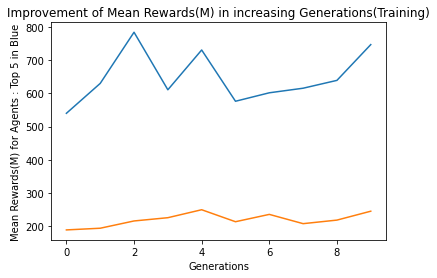

In [57]:
game_actions = 2 #2 actions possible: left or right

#disable gradients as we will not use them
torch.set_grad_enabled(False)

# initialize N number of agents
num_agents = 100
agents = return_random_agents(num_agents)

# How many top agents to consider as parents
top_limit = 10

# run evolution until X generations
generations = 10

elite_index = None
n=[]
m=[]

for generation in range(generations):

    # return rewards of agents
    rewards = run_agents_n_times(agents, 100) #return average of multiple runs
    #print(rewards)
    #sort by rewards
    sorted_parent_indexes = np.argsort(rewards)[::-1][:top_limit] #reverses and gives top values (argsort sorts by ascending by default) https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order
    print("")
    print("")
    top_rewards = []
    
    for best_parent in sorted_parent_indexes:
        top_rewards.append(rewards[best_parent])
    
    print("Generation ", generation, " | Mean rewards: ", np.mean(rewards), " | Mean of top 5: ",np.mean(top_rewards[:5]))
    #print(rewards)
    print("The minimum reward is earned is ",min(rewards),"by the ",rewards.index(min(rewards))+1,"th agent")
    print("Top ",top_limit," scores", sorted_parent_indexes)
    print("Rewards for top: ",top_rewards)
    
    m.append(np.mean(top_rewards))
    n.append(np.mean(rewards))
    # setup an empty list for containing children agents
    children_agents, elite_index = return_children(agents, sorted_parent_indexes, elite_index)

    # kill all agents, and replace them with their children
    agents = children_agents
x=np.arange(generations)
plt.plot(x,m)
plt.plot(x,n)
plt.title('Improvement of Mean Rewards(M) in increasing Generations(Training)')
plt.ylabel('Mean Rewards(M) for Agents : Top 5 in Blue')
plt.xlabel('Generations')
plt.show()

In [50]:

def play_agent(agent):
        env = gym.make("CartPole-v0")
        
        env_record = Monitor(env, './video', force=True)
        observation = env_record.reset()
        last_observation = observation
        r=0
        j=[]
        episode_durations=[]
        timestep=0
        for timestep in range(1000):
            env_record.render()
            inp = torch.tensor(observation).type('torch.FloatTensor').view(1,-1)
            output_probabilities = agent(inp).detach().numpy()[0]
            action = np.random.choice(range(game_actions), 1, p=output_probabilities).item()
            new_observation, reward, done, info = env_record.step(action)
            r=r+reward
            j.append(r)
            observation = new_observation

            if(done):
                break

        env_record.close()

        print("Total Collected Rewards: ",r)

In [ ]:
play_agent(agents[0])

Total Collected Rewards:  62.0
